# Load and Get to know the Dataset

In [1]:
# import the libraries
import numpy as np
import pandas as pd


# load the data
df = pd.read_csv('Data/Energy_consumption.csv')

print(df['Timestamp'].dtype)

# basic information of the dataset
print('\033[31mbasic information of the dataset\033[0m')
df.info()

# num of rows and columns

print('\033[31mnum of rows and columns\033[0m')
print(df.shape)

# tabular visulisation of the dataset
num_row = 10
print('\033[31mtop {} rows of the dataset\033[0m'.format(num_row))
print(df.head(num_row))

# statistical summary
print('\033[31mStatistical summary\033[0m')
print(df.describe())

object
basic information of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB
num of rows and columns
(1000, 11)
top 10 rows of the dataset
             Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  2022-01-01 00:00:00    25.

# Overview of the correlations between the variables

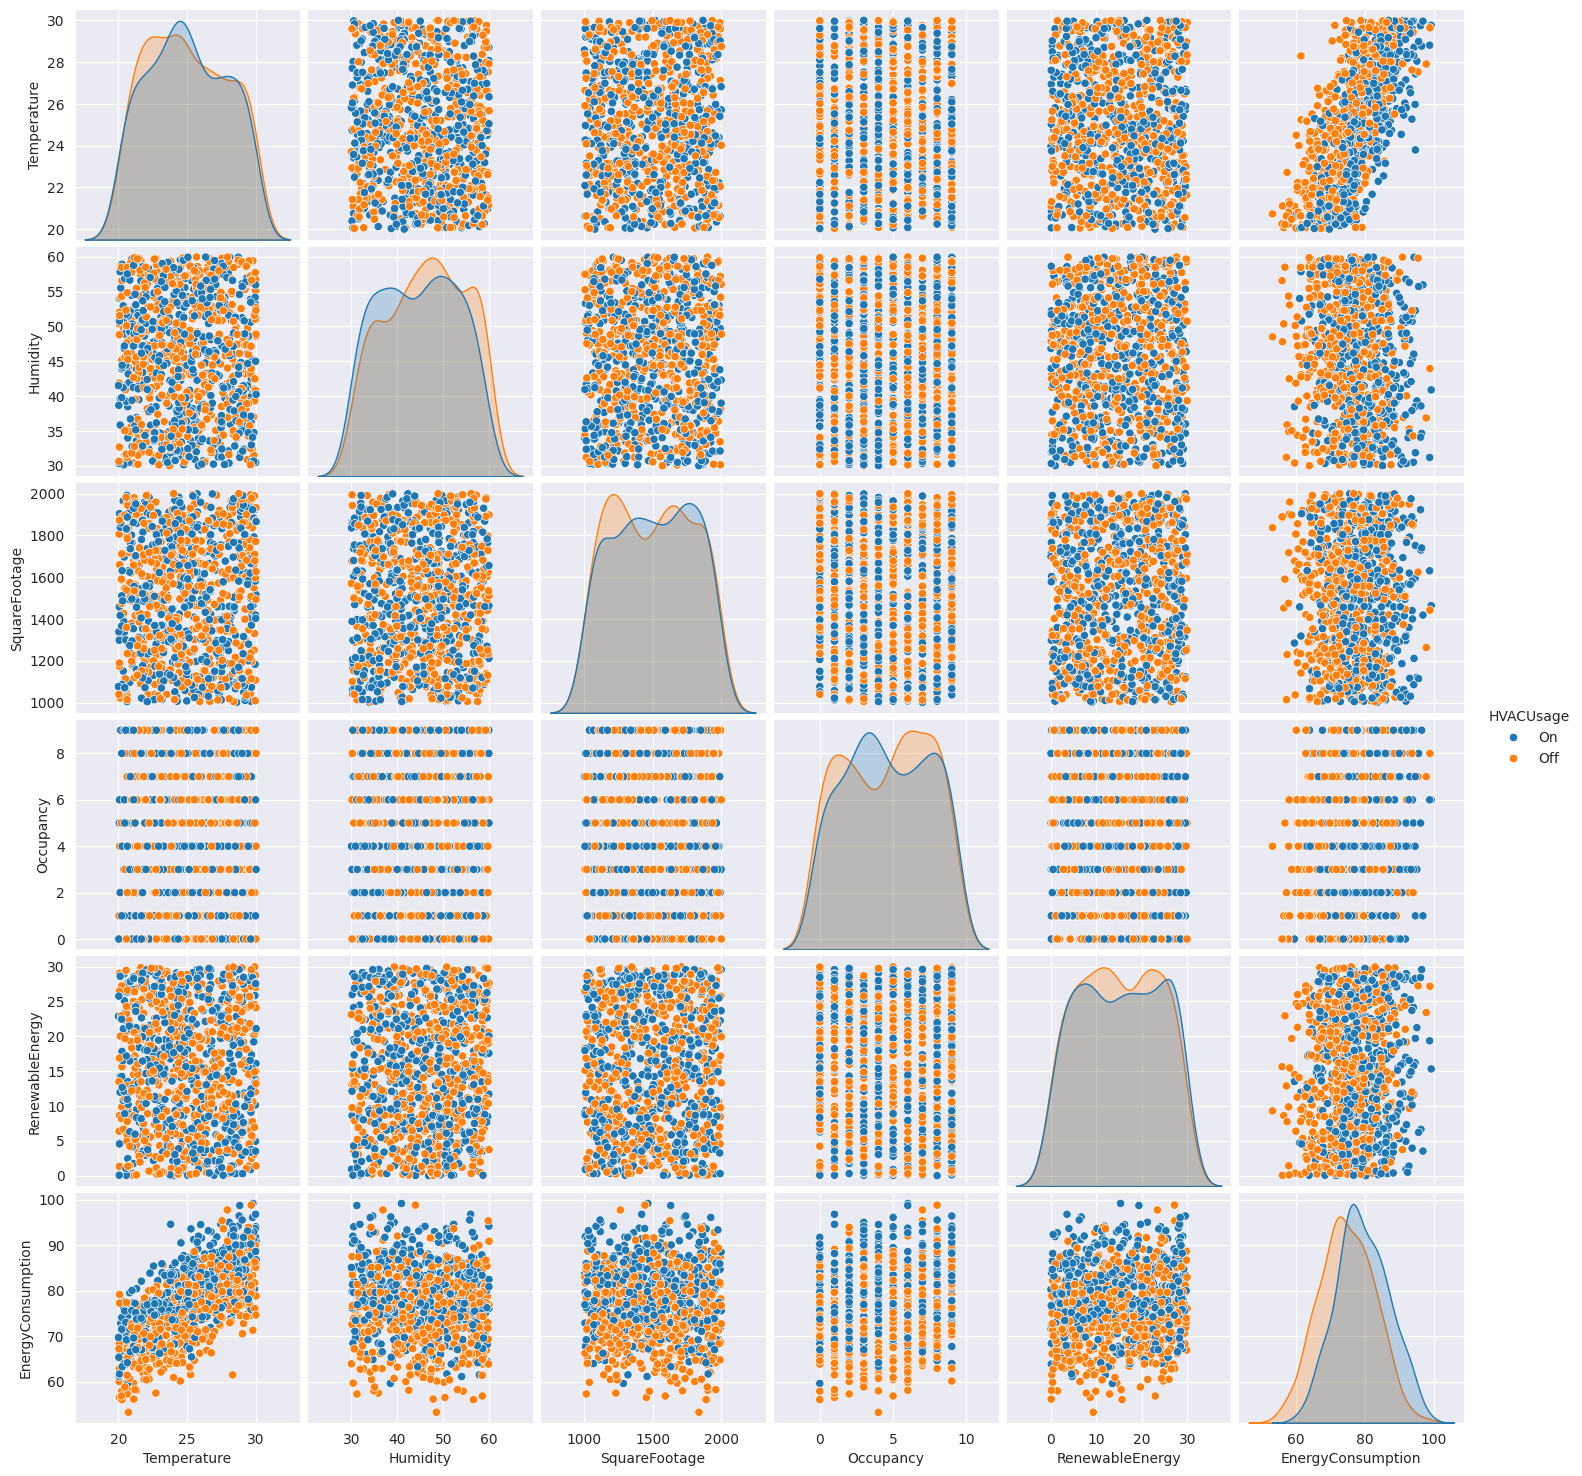

In [98]:
import seaborn as sns

df = pd.read_csv('Data/Energy_consumption.csv')

sns.pairplot(data=df, hue="HVACUsage") #, hue="Holiday or LightingUsage"


## Correlation between the weekdays and energy consumption


### Energy consumption for each day of the week

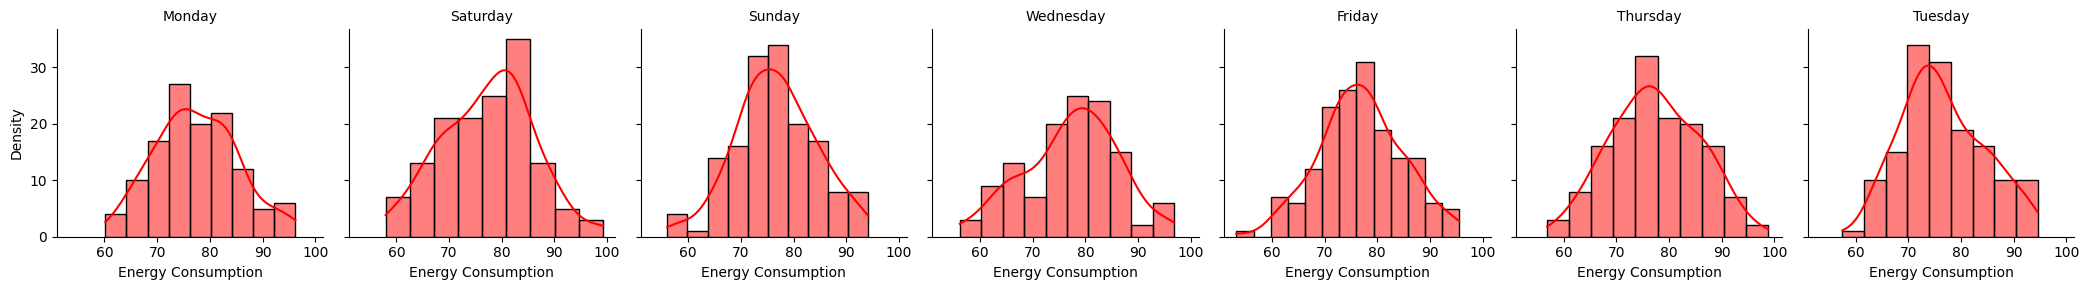

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("Data/Energy_consumption.csv")

EnergyEachDay = sns.FacetGrid(df, hue="DayOfWeek", col="DayOfWeek")

EnergyEachDay.map(sns.histplot, "EnergyConsumption", kde=True, color="red", alpha=0.5)

# Add legend and labels
EnergyEachDay.set_axis_labels("Energy Consumption", "Density")
EnergyEachDay.set_titles("{col_name}")
#EnergyEachDay.add_legend()

# Show the plot
plt.show()



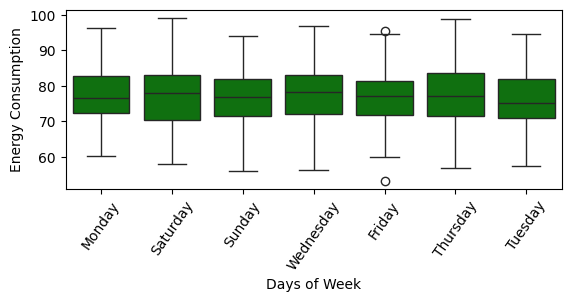

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("Data/Energy_consumption.csv")
fig, ax = plt.subplots()
sns.boxplot(x="DayOfWeek", y="EnergyConsumption", color="green", data=df)
plt.xlabel("Days of Week")
plt.ylabel("Energy Consumption")
#plt.title("Box Plot: Energy Consumption of Each Day of the Week")
plt.xticks(rotation=55)
ax.set_aspect(0.05)

# 

### Energy consumption during holidays

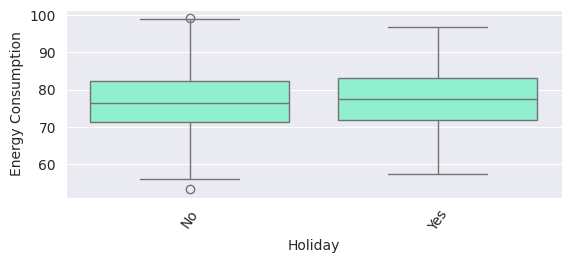

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("Data/Energy_consumption.csv")

fig, ax = plt.subplots()
sns.boxplot(x="Holiday", y="EnergyConsumption", color="#7FFFD4", data=df)
plt.xlabel("Holiday")
plt.ylabel("Energy Consumption")
#plt.title("Box Plot: Energy Consumption of Each Day of the Week")
plt.xticks(rotation=55)
ax.set_aspect(0.015)





### Add a newcolumn named "Weekend" to the dataset

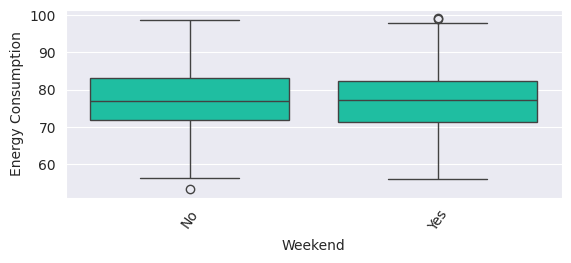

In [103]:
import pandas as pd

df = pd.read_csv("Data/Energy_consumption.csv")
df.head()

# list or work days
WeekDays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

# creating a new column: method I
df["Weekend"] = ["No" if days in WeekDays else "Yes" for days in df["DayOfWeek"]]

# creating a new column: method II
#for index, days in df["DayOfWeek"].iterrows():
    #print(index)
    #if days in WeekDays:
     #   df["Weekend"] = "No"
    #else:
      #  df["Weekend"] = "Yes"

df.head(20)
fig, ax = plt.subplots()
sns.boxplot(x="Weekend", y="EnergyConsumption", color="#04D8B2", data=df)
plt.xlabel("Weekend")
plt.ylabel("Energy Consumption")
#plt.title("Box Plot: Energy Consumption of Each Day of the Week")
plt.xticks(rotation=55)
ax.set_aspect(0.015)

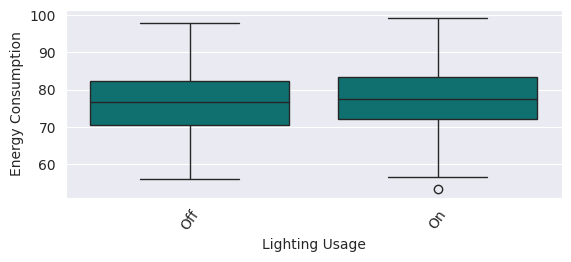

In [83]:
import pandas as pd

fig, ax = plt.subplots()
sns.boxplot(x="LightingUsage", y="EnergyConsumption", color="#008080", data=df)
plt.xlabel("Lighting Usage")
plt.ylabel("Energy Consumption")
#plt.title("Box Plot: Energy Consumption of Each Day of the Week")
plt.xticks(rotation=55)
ax.set_aspect(0.015)

### Subplots and Seaborn

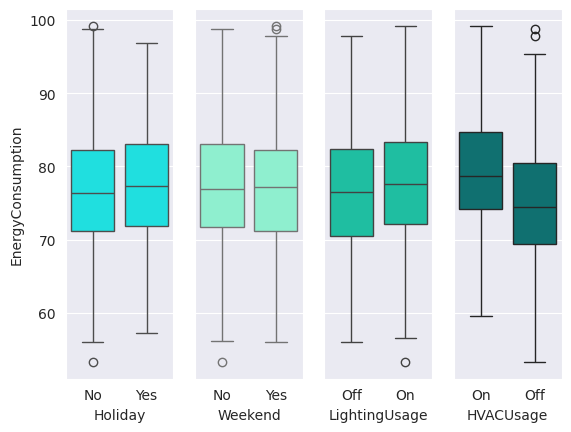

In [104]:
names_columns = ["Holiday", 'Weekend', 'LightingUsage', "HVACUsage"]
fig, axes = plt.subplots(1, 4, sharey=True)
colors=["#00FFFF", "#7FFFD4", "#04D8B2", "#008080"]

for i,t in enumerate(names_columns):
    sns.boxplot(x=t, y="EnergyConsumption", color=colors[i], data=df, orient='v', ax=axes[i % 4])


### Energy consumption and temperature

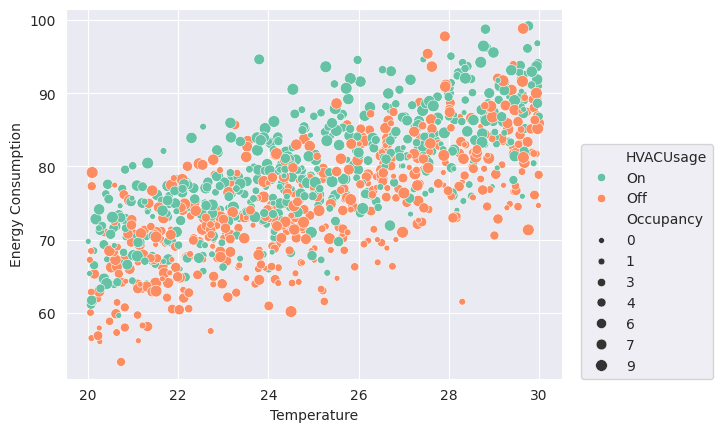

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x="Temperature", y="EnergyConsumption", hue="HVACUsage", size="Occupancy", palette='Set2', data=df)
plt.xlabel("Temperature")
plt.ylabel("Energy Consumption")
plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)


#plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
             #   mode="expand", borderaxespad=0, ncol=3)




### Energy consumption and humidity

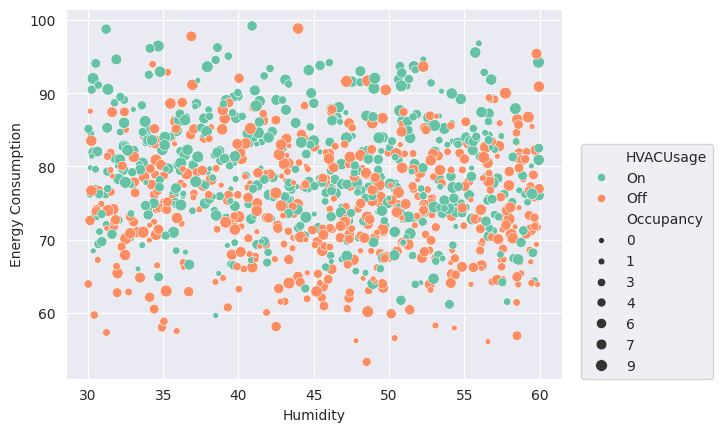

In [127]:

sns.scatterplot(x="Humidity", y="EnergyConsumption", hue="HVACUsage", size="Occupancy", palette='Set2', data=df)
plt.xlabel("Humidity")
plt.ylabel("Energy Consumption")
plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)





### Energy consumption and size of the houses

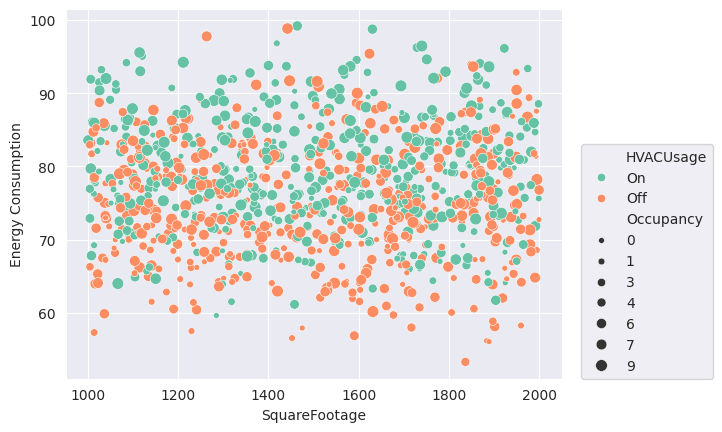

In [129]:

sns.scatterplot(x="SquareFootage", y="EnergyConsumption", hue="HVACUsage", size="Occupancy", palette='Set2', data=df)
plt.xlabel("SquareFootage")
plt.ylabel("Energy Consumption")
plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)

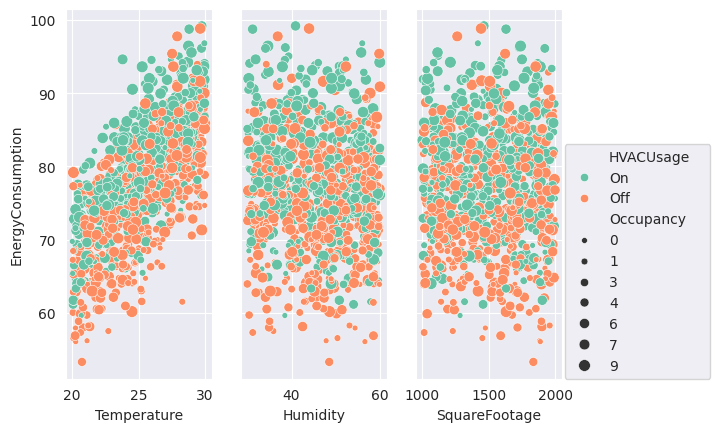

In [178]:
fig, ax = plt.subplots(1,3, sharey=True)

ax1 = sns.scatterplot(x='Temperature',y='EnergyConsumption', hue="HVACUsage", size="Occupancy",
                      palette='Set2', data=df,
                   color='b',ax=ax[0]) 
ax2 = sns.scatterplot(x=df['Humidity'],y=df['EnergyConsumption'],
                   color='r', hue="HVACUsage", size="Occupancy",
                      palette='Set2', data=df,ax=ax[1]) 
ax3 = sns.scatterplot(x=df['SquareFootage'],y=df['EnergyConsumption'],
                   color='g', hue="HVACUsage", size="Occupancy",
                      palette='Set2', data=df, ax=ax[2])
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
#plt.figlegend(loc='lower right',bbox_to_anchor=(0.85,0.25))
plt.legend(bbox_to_anchor=(1.02, 0, 1, 1), loc="lower left",
                mode="expand", borderaxespad=0, ncol=1)
plt.show()


# Data Visualisation and Dash boards

In [ ]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px
import pandas as pd

# load the data
energy_consumption = pd.read_csv('Data/Energy_consumption.csv')

# create an empty app
app = Dash()

# add the content to the app

app.layout = [

    html.H1('Energy Consumption'),
    dcc.Dropdown(energy_consumption.DayOfWeek.unique(), value = 'Monday', id = 'Dropdown-Selection-Weekdays')
    #dcc.Graph(id = 'Graph-Energy-Consumption')
]

#@callback(
#    Output (component_id = 'Graph_Energy_Consumption', component_property = 'figure')
#    Input  (component_id = 'Dropdown-Selection-Weekdays', component_property = 'value')
#)

# run the app  
if __name__ == '__main__':
    app.run(debug=True, port=9053)
add_legend_data
